WATER QUALITY PREDICTION
---
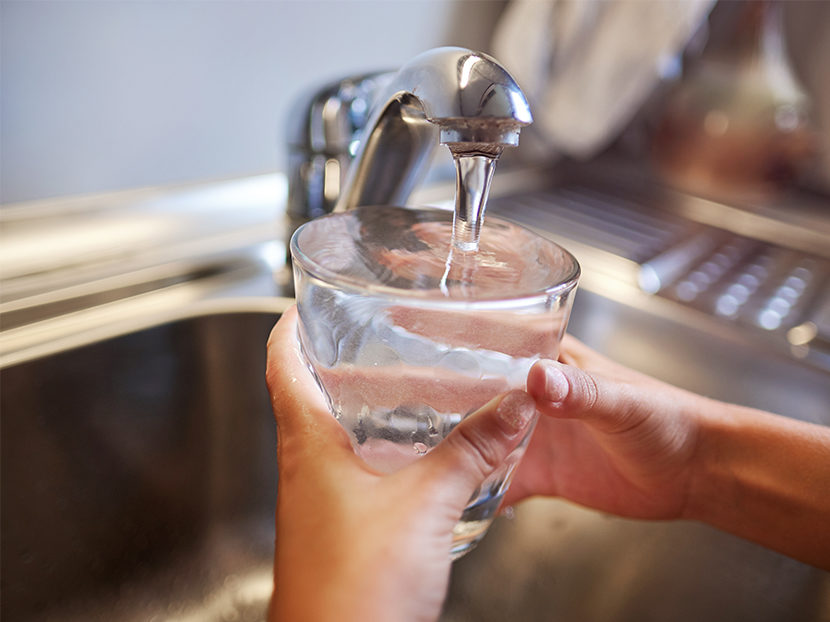
BY: PRECIOUS EBITE AZUN

IMPORTING ESSENTIAL LIBRARIES
---

In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] =(15, 15)
import warnings
warnings.filterwarnings('ignore')

In [150]:
water=pd.read_csv('water_quality.csv')
water.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.05786,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.54173,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [151]:
water.tail()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3271,4.668102,193.681736,47580.99160,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.80216,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.57822,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.86938,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1
3275,7.874671,195.102299,17404.17706,7.509306,NaN,327.459761,16.140368,78.698446,2.309149,1


In [152]:
water.info()
water.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


(3276, 10)

In [153]:
water.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690300,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833605,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762125,8.114887,359.950170,481.792305,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196010,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [154]:
water.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [155]:
water.ph.replace(to_replace=np.NaN, value=water.ph.mean(), inplace=True)
water.Sulfate.replace(to_replace=np.NaN, value=water.Sulfate.mean(), inplace=True)
water.Trihalomethanes.replace(to_replace=np.NaN, value=water.Trihalomethanes.mean(), inplace=True)

In [156]:
water.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [157]:
water.duplicated().sum()

0

In [158]:
P= water.corr()
P

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.075833,-0.081884,-0.031811,0.014403,0.017192,0.040061,0.002994,-0.036222,-0.003287
Hardness,0.075833,1.000000,-0.046899,-0.030054,-0.092766,-0.023915,0.003610,-0.012690,-0.014449,-0.013837
Solids,-0.081884,-0.046899,1.000000,-0.070148,-0.149840,0.013831,0.010242,-0.008875,0.019546,0.033743
Chloramines,-0.031811,-0.030054,-0.070148,1.000000,0.023791,-0.020486,-0.012653,0.016627,0.002363,0.023779
Sulfate,0.014403,-0.092766,-0.149840,0.023791,1.000000,-0.014059,0.026909,-0.025605,-0.009790,-0.020619
Conductivity,0.017192,-0.023915,0.013831,-0.020486,-0.014059,1.000000,0.020966,0.001255,0.005798,-0.008128
Organic_carbon,0.040061,0.003610,0.010242,-0.012653,0.026909,0.020966,1.000000,-0.012976,-0.027308,-0.030001
Trihalomethanes,0.002994,-0.012690,-0.008875,0.016627,-0.025605,0.001255,-0.012976,1.000000,-0.021502,0.006960
Turbidity,-0.036222,-0.014449,0.019546,0.002363,-0.009790,0.005798,-0.027308,-0.021502,1.000000,0.001581
Potability,-0.003287,-0.013837,0.033743,0.023779,-0.020619,-0.008128,-0.030001,0.006960,0.001581,1.000000


<AxesSubplot:>

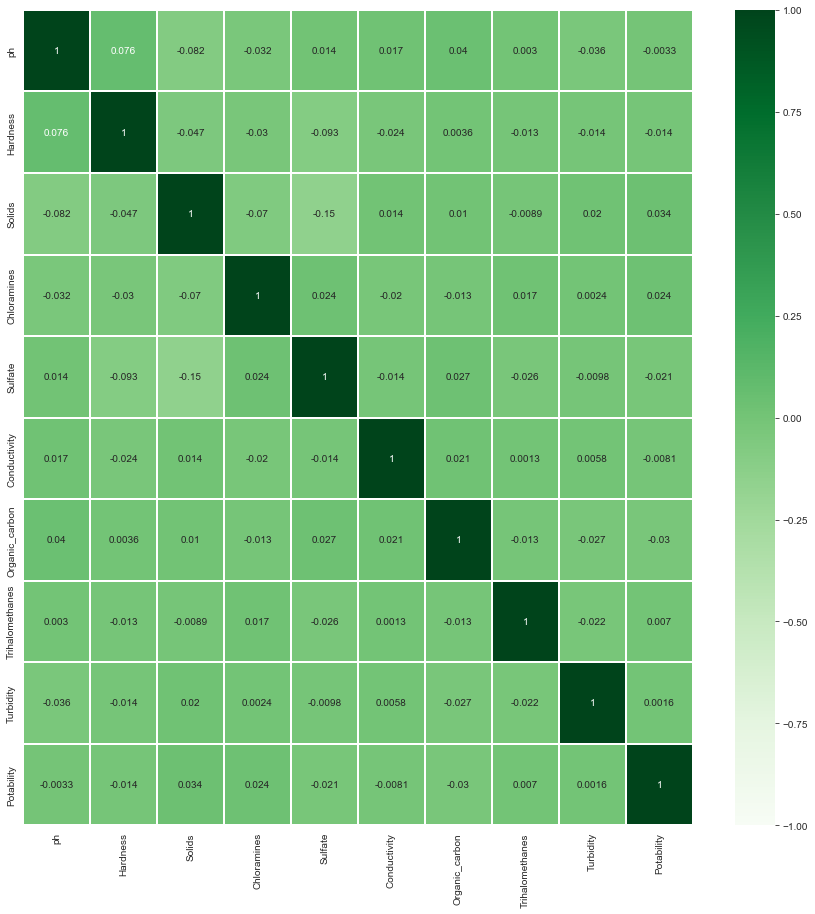

In [159]:
sns.set_style('darkgrid')
sns.heatmap(P, vmin=-1,vmax=1, cmap = "Greens", annot=True, linewidth=0.1)

<AxesSubplot:xlabel='Potability', ylabel='count'>

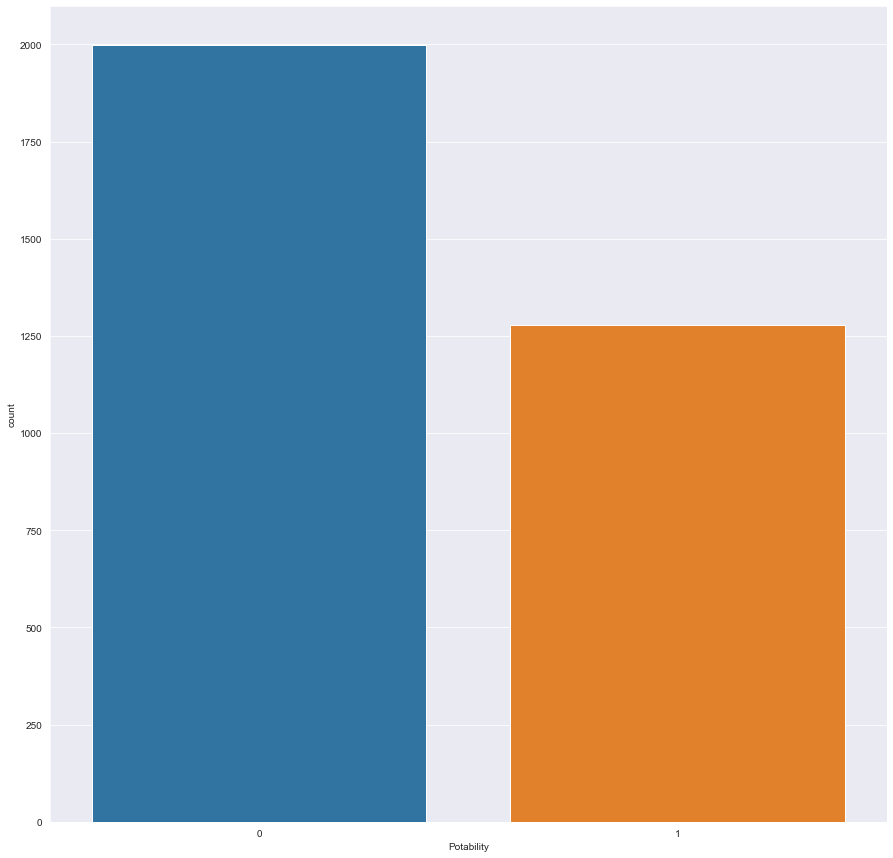

In [160]:
sns.countplot(x='Potability', data=water)

array([[<AxesSubplot:title={'center':'ph'}>,
        <AxesSubplot:title={'center':'Hardness'}>,
        <AxesSubplot:title={'center':'Solids'}>],
       [<AxesSubplot:title={'center':'Chloramines'}>,
        <AxesSubplot:title={'center':'Sulfate'}>,
        <AxesSubplot:title={'center':'Conductivity'}>],
       [<AxesSubplot:title={'center':'Organic_carbon'}>,
        <AxesSubplot:title={'center':'Trihalomethanes'}>,
        <AxesSubplot:title={'center':'Turbidity'}>],
       [<AxesSubplot:title={'center':'Potability'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

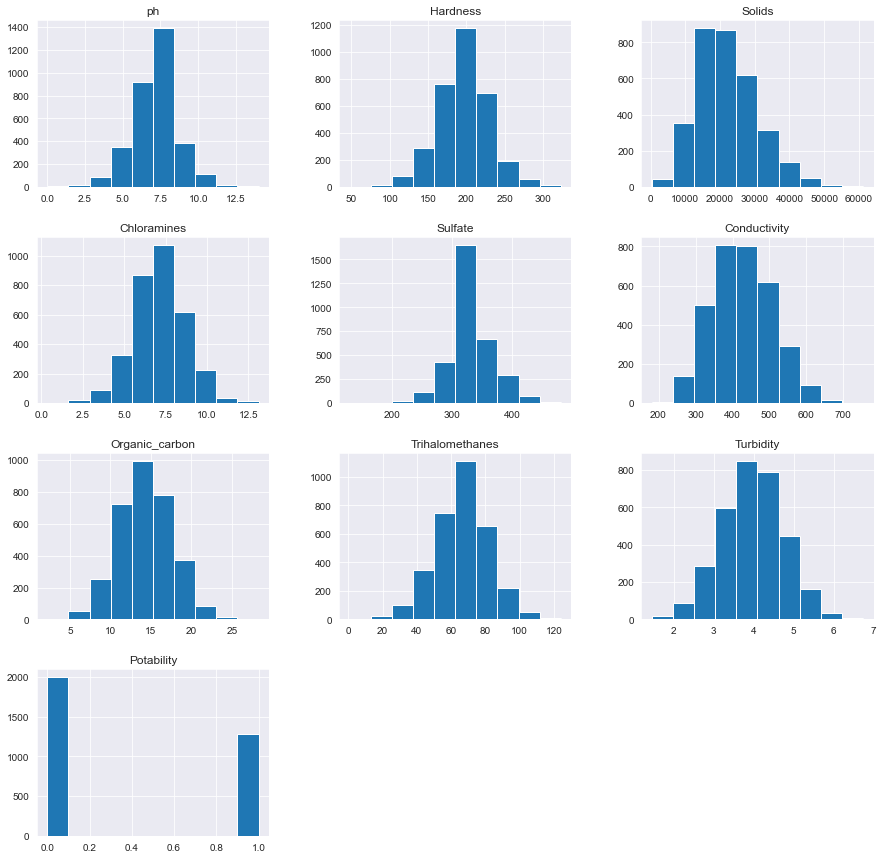

In [161]:
water.hist()

([<matplotlib.patches.Wedge at 0x1deb7cc26d0>,
 [Text(-0.3722543665175176, 1.0350974285586076, 'Not_Potable'),
  Text(0.3722543665175174, -1.0350974285586076, 'Portable')],
 [Text(-0.2030478362822823, 0.5645985973956041, '61%'),
  Text(0.2030478362822822, -0.5645985973956041, '39%')])

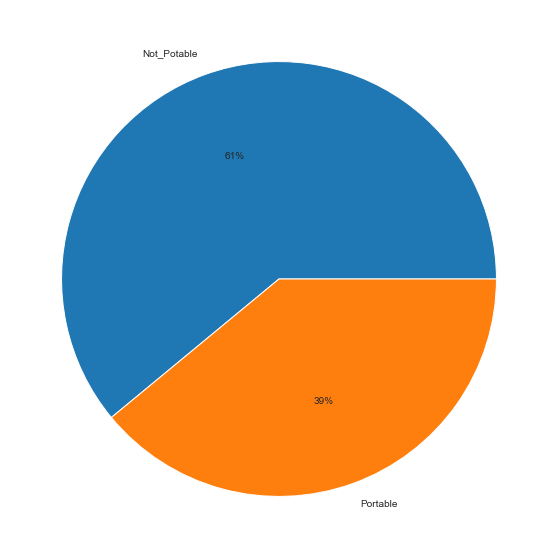

In [162]:
plt.figure(figsize=(15,10))
plt.pie(water['Potability'].value_counts(), labels=['Not_Potable','Portable'], autopct= '%0.0f%%')

Partioning

In [163]:
X=water.drop(labels='Potability', axis=1)
X

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,7.080795,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135
1,3.716080,129.422921,18630.05786,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656
2,8.099124,224.236259,19909.54173,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075
...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681736,47580.99160,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821
3272,7.808856,193.553212,17329.80216,8.061362,333.775777,392.449580,19.903225,66.396293,2.798243
3273,9.419510,175.762646,33155.57822,7.350233,333.775777,432.044783,11.039070,69.845400,3.298875
3274,5.126763,230.603758,11983.86938,6.303357,333.775777,402.883113,11.168946,77.488213,4.708658


In [164]:
Y= water['Potability']
Y

0       0
1       0
2       0
3       0
4       0
       ..
3271    1
3272    1
3273    1
3274    1
3275    1
Name: Potability, Length: 3276, dtype: int64

In [165]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=42, shuffle=True)
X_train

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
2985,7.080795,188.445470,28791.614420,8.040356,382.009477,422.234861,10.575690,63.235365,3.228379
1073,7.203439,168.445358,22826.484700,6.283250,271.892045,437.370863,16.410654,64.505923,6.389161
3140,7.080795,242.827588,29298.074260,5.853840,340.348645,463.115174,5.426650,66.396293,3.522586
2643,6.056818,211.765886,4440.277357,9.507303,333.775777,316.921776,17.766397,53.541191,3.358061
2174,9.581189,223.296216,28292.780320,5.665431,333.775777,398.479317,11.350768,44.574120,3.929178
...,...,...,...,...,...,...,...,...,...
1095,4.187491,208.374188,21809.709830,5.846112,327.474203,264.508083,11.235144,46.682597,4.592959
1130,7.793915,164.958947,25506.912240,7.868036,358.259200,398.460312,15.297496,66.396293,4.220028
1294,6.630364,186.761088,30939.023210,7.703481,333.775777,330.876083,13.815757,86.753118,3.490588
860,8.783168,218.032840,16183.586650,7.390474,334.053885,389.021616,16.354520,47.100982,4.274137


In [166]:
X_test

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
2947,7.080795,183.521107,20461.252710,7.333212,333.119476,356.369022,20.179029,67.019903,4.886634
2782,6.643159,188.913541,32873.820020,6.791509,333.848842,336.561501,14.706810,67.844849,4.562198
1644,7.846058,224.058877,23264.109970,5.922367,300.402620,387.971336,13.406737,43.075186,2.487969
70,7.160467,183.089310,6743.346066,3.803036,277.599099,428.036344,9.799625,90.035374,3.884891
2045,6.615350,179.240661,26392.863610,9.309160,333.775777,496.363562,12.786595,78.262369,4.453443
...,...,...,...,...,...,...,...,...,...
542,9.895889,210.654041,13189.519380,4.945128,333.775777,481.136793,11.763453,49.851928,3.813429
3189,6.886513,211.454417,35018.325600,6.067597,333.775777,549.997058,8.445127,27.663174,3.599756
1921,7.288737,233.977810,31617.075410,8.533888,331.838167,490.047095,12.225342,31.802024,3.531385
2839,7.243482,196.982379,29772.019250,6.497201,333.775777,322.365237,14.154955,50.655001,4.763579


In [167]:
Y_train

2985    0
1073    1
3140    1
2643    0
2174    0
       ..
1095    1
1130    1
1294    0
860     0
3174    1
Name: Potability, Length: 2293, dtype: int64

In [168]:
Y_test

2947    0
2782    1
1644    0
70      0
2045    1
       ..
542     0
3189    1
1921    1
2839    1
2484    0
Name: Potability, Length: 983, dtype: int64

In [169]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((2293, 9), (983, 9), (2293,), (983,))

Decision Tree
---

In [170]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train,Y_train)

DecisionTreeClassifier()

In [171]:
Y_predict=dt.predict(X_test)

In [172]:
Y_test

2947    0
2782    1
1644    0
70      0
2045    1
       ..
542     0
3189    1
1921    1
2839    1
2484    0
Name: Potability, Length: 983, dtype: int64

In [173]:
Y_predict

array([0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0,

In [177]:
from sklearn.metrics import accuracy_score
ac_dt=accuracy_score(Y_test,Y_predict)
ac_dt

0.5615462868769074

In [179]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [182]:
lr.fit(X_train,Y_train)

LogisticRegression()

In [184]:
Y_predict=lr.predict(X_test)

In [186]:
Y_test

2947    0
2782    1
1644    0
70      0
2045    1
       ..
542     0
3189    1
1921    1
2839    1
2484    0
Name: Potability, Length: 983, dtype: int64

In [188]:
Y_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [191]:
from sklearn.metrics import accuracy_score
ac_lr=accuracy_score(Y_test,Y_predict)
ac_lr

0.6276703967446592

In [193]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier()